# L'ensemble de données de revenu du recensement 

## Apperçu sur la base de données 

In [326]:
# cette base de donnes contient un recensement relier au perssones , comme l'age , le sex ,éducation,pays etc..., tous ça 
# represente les variable independante qu'on va appeler "input features"

# notre objectif ces't de predire le revenu autrement dit notre output , 
# cette categorie a uniquement deux valeur >$50,000 et <$50,000 par ans

# notre base de donnés va contenir deux base de donnés separé nommé train_set et test_set 

# il y'aura environ 49,000 data point , dans 2/3 pour train_set et 1/3 pour test_set  

# NOTE IMPORTANTE

In [327]:
# çe pre-processing va s'appliquer sur tous les algorithmes "CART" , "Adaboost" et "Random Forests" 

## Importer les packages pertinents

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

# Pre-processing 

## Training dataset 

In [392]:
# importer la base de données

train_data=pd.read_csv(r'C:\Users\PC\Documents\python dataset\Census_income_train.csv')

In [330]:
# Inspecter la base de données 
train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [331]:
# on peux voir tous variables independante "features" du recensement (age,occupation...) , et inclus notre variable 
# depandante/target , le revenu=income  

In [332]:
# pour voir la taille de notre base il suffit de appliquer :
len(train_data)
#32560 data point 

32560

In [333]:
# pour checker les valeur manquante :
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

In [334]:
#  tous les 0 exprime qu'il y'a pas de valeur manquante mais en lisant linfo de notre base de données, on découvre que 
# les valeur manquante sont indiqué avec un '?' dans la base de données 

## Suppression des lignes avec des valeurs inconnues ('?')

In [335]:
# apres avoir consulter , il y'a 3 colonnes qui contient '?' , Workclass, Occupation, Native-country 
# methode utilisé pour consulter : train_data["Workclass"].str.contains("\?").sum()

In [336]:
#Commençons par la colonne Workclass.
#Nous pouvons obtenir une liste de valeurs booléennes indiquant s'il y a un '?' sur la ligne actuelle

train_data["Workclass"].str.contains("\?")
# sans le '\' python va le comprendre comme un symbole speciale utilisé dans des expressions regulière 

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Name: Workclass, Length: 32560, dtype: bool

In [337]:
# False veux signifer que il y'a pas de '?' dans la ligne , l'opposé pour True

# on va voir les quelle des index qui possédent un 'True' et les supprimer de la base de données originale 

# petite remarque : le fait que cest une serie de valeurs boolienne de la meme taille que la base de données , a dataframe
# qui fournie une liste boolienne va retourner uniquement les ligne qui correspond a True alors:
# si on fournie cette liste boolienne ça va nous retourner uniquement les ligne qui contient '?' et cest le contraire ce qu'on
# veux .

# pour inverser les valeur boolienne:
train_data["Workclass"].str.contains("\?") == False

0        True
1        True
2        True
3        True
4        True
         ... 
32555    True
32556    True
32557    True
32558    True
32559    True
Name: Workclass, Length: 32560, dtype: bool

In [338]:
# Prenons le sous-ensemble des lignes du dataframe qui ne contiennent pas de '?'

In [339]:
clean_train_data = train_data[train_data["Workclass"].str.contains("\?") == False]
# train_data["Workclass"].str.contains("\?") == False ------> la liste boliennee.
 # train_data la base qu'on a fournis. 
    
# ce code va selecter tous les ligne qui ne contient pas '?' de la base de données original de la colonne workclass ,
# et assignier a la nouvelle variable clean_train_data
clean_train_data 

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [340]:
clean_train_data["Workclass"].str.contains("\?").sum()

0

In [341]:
len(clean_train_data)

30724

In [342]:
# on a pu suprrimer 1836 valeur manquante 

In [343]:
# faisons la meme chose pour Occupation, Native-country

In [344]:
clean_train_data = clean_train_data[clean_train_data["Occupation"].str.contains("\?") == False]

In [345]:
len(clean_train_data)

30717

In [346]:
clean_train_data = clean_train_data[clean_train_data["Native-country"].str.contains("\?") == False]

In [347]:
len(clean_train_data)

30161

In [348]:
# enfin réinitialisons l'index , car ça peux sauter entre ligne par exemple de 26 à 29 car a on a suprrimer la ligne 27 et 28
# pour eviter ça :
clean_train_data = clean_train_data.reset_index(drop=True)

In [349]:
clean_train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [350]:
clean_train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [351]:
# passons a autre choses ,on remarque dans notre base de données certain "features" sont numérique et d'autre sont catégorique
# ce n'est pas vraiment un problème car decesion tress et random forests marche avec des valeur categorique. 

# malheuresement sklearn n'a implementer cette option , alors on va l'appliquer manuellement.
# on va transformer les "categorical features" a des "numerical features" a partir de "one hot encode" 

# Creation des dummy variables et séparer inputs / targets

In [352]:
# le packages panda facilite la tache
train_dummies = pd.get_dummies(clean_train_data, drop_first=False)

In [353]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [354]:
# dans les deux dernieres colonnes on remarque que les deux contient la meme information "target=income" 
# alors on va supprimer une des deux , on va supprimer <=50K , et on va garder >50K
train_dummies = train_dummies.drop(['Income_ <=50K'],axis=1)

In [355]:
# maintenant on va séparer inputs des targets 

# The input features sont tous mise a part la derniere colonne
train_input = train_dummies.iloc[:,:-1]

# The target/output cest uniquement la derniere colonne 
train_target = train_dummies.iloc[:,-1]



In [356]:
# the training set est préte on peux commencer par training le model, mais de preférence on applique le pre-processing pour 
# test set aussi pour tous accomplir a la fois.

# le pre-processing sera le meme 

In [357]:
train_input.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [358]:
feature0 = test_dummies.iloc[:, 0]

# print the 0 feature
print(feature0)

0        25
1        38
2        28
3        44
4        34
         ..
15055    33
15056    39
15057    38
15058    44
15059    35
Name: Age, Length: 15060, dtype: int64


# Test dataset

In [359]:
# importer la base de test set 

test_data = pd.read_csv(r"C:\Users\PC\Documents\python dataset\Census_income_test.csv")

In [360]:
# examiner 
test_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [361]:
test_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

In [362]:
len(test_data)

16281

## Suppression des lignes avec des valeurs inconnues ('?')

In [363]:
clean_test_data = test_data[test_data["Workclass"].str.contains("\?") == False]

In [364]:
len(clean_test_data)

15318

In [365]:
clean_test_data = clean_test_data[clean_test_data["Occupation"].str.contains("\?") == False]

In [366]:
len(clean_test_data)

15315

In [367]:
clean_test_data = clean_test_data[clean_test_data["Native-country"].str.contains("\?") == False]

In [368]:
len(clean_test_data)

15060

In [369]:
clean_test_data = clean_test_data.reset_index(drop=True)

In [370]:
clean_test_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


## Creation des dummy variables et séparer inputs / targets

In [371]:
test_dummies = pd.get_dummies(clean_test_data, drop_first=False)

In [372]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.,Income_ >50K.
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [373]:
test_dummies = test_dummies.drop(['Income_ <=50K.'],axis=1)

In [374]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K.
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [375]:
test_input = test_dummies.iloc[:,:-1]
test_target = test_dummies.iloc[:,-1]

In [376]:
test_target.head()

0    0
1    0
2    1
3    1
4    0
Name: Income_ >50K., dtype: uint8

In [377]:
test_input.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# PART 1 : CART 

## 1\ Historique et définition 

### L'algorithme CART (Classification and Regression Tree) a été développé par Leo Breiman, Jerome Friedman, Richard Olshen et Charles Stone à l'Université de Californie à Berkeley dans les années 1980. Il a été conçu comme une méthode pour construire des arbres de décision à partir de données d'apprentissage afin de résoudre des problèmes de classification et de régression.

### L'algorithme CART a connu un grand succès dans les années 1990 et 2000 en raison de sa simplicité, de sa facilité d'utilisation et de sa capacité à gérer des données de grande dimension. Il a été largement utilisé dans des domaines tels que la bio-informatique, la finance, l'ingénierie et la médecine, entre autres.


### L'idée principale de l'algorithme CART est de diviser l'ensemble de données en sous-ensembles homogènes en fonction des valeurs de certaines variables, de manière à ce que les arbres de décision construits soient les plus simples et les plus précis possible. L'algorithme CART utilise une méthode de partitionnement récursif pour construire l'arbre de décision en choisissant à chaque étape la variable et la valeur seuil qui divisent le mieux les données en sous-ensembles homogènes.

# 2\ Les étapes de L’algorithme CART

## 1.Sélection de la variable de séparation

L'algorithme CART commence par sélectionner la variable de séparation la plus importante pour diviser les données en deux groupes. La variable de séparation est choisie en fonction de sa capacité à diviser les données en groupes homogènes.


## 2.Détermination du point de séparation

Une fois que la variable de séparation est choisie,l'algorithme CART détermine le point de séparation optimal pour 
diviser les données en deux groupes.
Le point de séparation est choisi en fonction de la réduction d'impureté qu'il peut apporter à l'ensemble de données.


## 3.Construction de l'arbre


L'algorithme CART continue à diviser les données en utilisant la même procédure que celle décrite ci-dessus.
L'arbre est construit en répétant cette procédure pour chaque nœud de l'arbre jusqu'à ce que toutes les feuilles soient
homogènes ou qu'une condition d'arrêt soit atteinte.


## 4.Prédiction


Une fois que l'arbre est construit et élagué, il peut être utilisé pour la prédiction en fonction des données d'entrée. 
Les données sont transmises dans l'arbre jusqu'à ce qu'elles atteignent une feuille, qui est ensuite utilisée pour prédire 
la valeur de sortie.

# Implementations du code 

In [258]:
# on a besoin de deux librarie uniquement numpy et pandas 


In [259]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
train_input.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
train_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Income_ >50K, dtype: uint8

# Code avec explication :

# Classe de noeud

In [373]:
class Node():
    def __init__(self,feature_index=None ,thresehold=None,left=None,right=None ,info_gain=None , value=None):
        ''' constructer '''
        
        # pour le noeud de decision 
        self.feature_index = feature_index
        self.thresehold = thresehold
        self.left=left
        self.right=right
        self.info_gain=info_gain
        
        # pour la feuille de l'arbre
        self.value=value
    
# Explication du code : 
# Pour une construction d'une arbre de deçision il faut d'abord determiner une classe de noeud.

# Une arbre de deçision contient deux noeud un noeud de deçision et un noeud de feuille ou feuille de l'arbre.

# Le noeud de deçision contient une condition elle est definit par feature_index(index de caractéristique) et 
# threshold(seuil) pour cette variable. 

# left/right : ces't l'acces pour le nœud enfant respectivement.

# info_gain : cette variable Stocker le gain d'information résultant de la division effectuée par 
# ce nœud de décision particulier.

# value : La classe majoritaire de la feuille de l'arbre , Cela nous aidera à déterminer la classe d'un nouveau 
# point de données si ce dernier se retrouve dans cette feuille de l'arbre particulière.

# Classe de l'arbre 

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # Initialiser la racine de l'arbre.
        self.root = None
        
        # Conditions d'arrêt
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    # explication : 
    # Dans le constructeur, nous avons défini trois attributs qui seront utilisés par différentes fonctions qui 
    # seront définies à l'intérieur de la classe.
    
    # root : Nous aurons besoin de root pour traverser l'arbre.
    
    #Les deux autres attributs sont simplement les conditions d'arrêt. Si dans un nœud particulier, le nombre 
    #d'échantillons devient inférieur au nombre d'échantillons minimum, nous ne diviserons plus ce nœud et le traiterons 
    #comme une feuille. De même, si la profondeur de l'arbre atteint la profondeur maximale, nous ne diviserons plus le nœud.
        
    
    

# Creation de l'arbre

In [ ]:
# Le plus important :
    
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = train_input,train_target
        num_samples, num_features = np.shape(X)
        
        # Explication 1 : 
        
        #C'est une fonction récursive pour construire l'arbre binaire de manière récursive. 
        #Elle se contente simplement de diviser les variables 'features' et 'targets' en deux variables séparées pour 
        #faciliter notre travail. Ensuite, elle extrait simplement le nombre d'échantillons et le nombre de fonctionnalités 
        #que nous pouvons facilement obtenir à l'aide de la fonction np.shape.
        

In [ ]:
# Séparer jusqu'à ce que les conditions d'arrêt soient satisfaites:
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            #Trouver la meilleure séparation
            best_split = self.get_best_split(dataset, num_samples, num_features)
          
    
        #Dans la première instruction 'if', nous vérifions si le nombre d'échantillons est supérieur ou égal au nombre 
        #d'échantillons minimum et que la profondeur actuelle est inférieure ou égale à la profondeur maximale. 
        #Si ces conditions ne sont pas remplies, nous ne pouvons pas diviser l'arbre plus loin. Ensuite, nous utilisons 
        #la fonction 'best_split' pour obtenir la meilleure séparation.
        
        
        
            

In [ ]:
#Ici, nous vérifions si le gain d'information correspondant à cette séparation 
        #est supérieur à zéro. Pourquoi ? Parce que le gain d'information égal à zéro signifie que nous 
        #divisons un nœud qui est déjà pur, c'est-à-dire que le nœud ne contient qu'un seul type de classe, 
        #et cela n'a aucun sens
        # Vérifier si le gain d'information est positif:
            if best_split["info_gain"]>0:
                
                #Voici la récursivité car nous appelons la fonction build tree à l'intérieur de la fonction build tree, 
                #donc d'abord, elle créera tous les sous-arbres de gauche, puis une fois qu'elle a atteint le nœud feuille, 
                #elle créera les sous-arbres de droite. Nous devons augmenter la variable de profondeur ici.
                # Récursivité à gauche:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # Récursivité à droite:
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                
                
                #Après que l'arbre est construit, nous devons retourner un nœud qui sera un nœud de décision. 
                #Comme c'est un nœud de décision, nous devons passer feature_index , threshold , the left subtree and right 
                #subtress connectors and the information gain.  best split sera retourné par la fonction dictionnaire de 
                #best split. 
                # Retourner le nœud de décision:
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])

        # on aurons besoin uniquement de la variable value 
        # Calculer la feuille de l'arbre:
        leaf_value = self.calculate_leaf_value(Y)
        # return la feuille de l'arbre:
        return Node(value=leaf_value)

# Fonction pour diviser la base de donneés 

In [ ]:
 def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
        #Ici, la fonction de division que nous avons utilisée dans la fonction précédente. 
        #Cette fonction prend l'ensemble de données, l'indice de la caractéristique et la valeur seuil et 
        #la divise en deux parties : 
        #la première partie pour l'enfant gauche et la deuxième partie pour l'enfant droit. 
        
        #Comment cela fonctionne-t-il ? Vraiment simple:
        
        #nous avons utilisé la compréhension de liste. Pour l'enfant gauche, nous enverrons les points 
        #de données qui ont satisfait notre condition de seuil, donc nous passons toutes les lignes pour 
        #lesquelles la valeur de la caractéristique est inférieure ou égale à la valeur de seuil, 
        #et dans l'enfant droit, nous passons les lignes pour lesquelles la valeur de la caractéristique 
        #particulière est supérieure au seuil.

#  Fonction pour calculer information gain


**La formule de l'Information Gain est  :**
$$ \text{Information Gain} = \text{Entropie(parent)} - \sum_{i=1}^{k}\frac{N_i}{N}\text{Entropie}(i) $$


In [ ]:
def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    #Cette fonction de gain d'information soustrait simplement l'information combinée des nœuds enfants de 
    #l'information du nœud parent. 
    
    #Nous avons utilisé des poids qui ne sont rien d'autre que les tailles relatives des nœuds 
    #enfants par rapport au nœud parent. 
    
    #Nous avons utilisé deux types de fonctions pour mesurer l'information contenue dans un système, 
    #la première étant l'entropie et la deuxième étant le Gini.
    

# Fonction pour calculer entropy 

**La formule de l'entropie est  :**
$$ \text{Entropie}(S) = -\sum_{i=1}^{c}p_i\log_2p_i $$

In [ ]:
def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

# Fonction pour calculer l'indice de gini 

**La formule de l'indice de Gini :** 
 $$ Gini = 1 - \sum_{i=1}^{c}p_i^2 $$


In [ ]:

    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini  

# Fonction pour le best split 

In [ ]:
def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # Dictionnaire pour stocker la meilleure division:
        best_split = {}
        max_info_gain = -float("inf")
        
        #Comme nous l'avons vu précédemment dans la fonction build, la fonction get best split renvoie un dictionnaire. 
        #Nous définissons donc tout d'abord un dictionnaire vide appelé best split, puis nous initialisons un gain 
        #d'information maximum à moins l'infini, car nous voulons maximiser le gain d'information et pour cela, 
        #nous devons utiliser un nombre inférieur à tout autre nombre.
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            
            #Maintenant, tout d'abord, nous allons parcourir toutes les fonctionnalités et à l'intérieur de cette boucle,
            #nous devrons traverser toutes les valeurs de seuil possibles. Les fonctionnalités sont des nombres réels et il
            #existe une infinité de nombres réels entre deux nombres éditoriaux, il n'a donc pas de sens d'itérer sur chaque
            #nombre réel possible. À la place, nous allons parcourir chaque valeur possible d'une fonctionnalité 
            #que nous avons rencontrée dans notre ensemble de données.
            
            #La fonction np.unique retourne simplement les valeurs uniques d'une fonctionnalité particulière de sorte que nous 
            #puissions traverser toutes les valeurs possibles de cette fonctionnalité
            
            
            
            
            # loop over all the feature values present in the data:
            
            #Dans la deuxième boucle, tout d'abord, nous divisons l'ensemble de données en fonction de 
            #l'indice de la caractéristique actuelle et du seuil actuel.
            for threshold in possible_thresholds:
                
                # get current split:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                
                #À cet état, nous avons obtenu l'ensemble de données gauche et l'ensemble de données droite. 
                
                    
                
                # check if childs are not null:
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    
                    #Nous devons nous assurer que ceux-ci ne sont pas vides, donc une fois que nous savons que 
                    #nous avons quelque chose avec quoi travailler, nous extrayons simplement les valeurs cibles, 
                    #qui sont désignées par y ici.
                    
                
                    
                    
                    # compute information gain:
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    
                    #Ensuite, nous devons calculer le gain d'information, et pour cela, nous avons utilisé une 
                    #fonction appelée gain d'information. Nous avons utilisé l'indice de Gini pour 
                    #calculer le gain d'information.
                    
                    
                    
                    #Une fois que nous avons obtenu le gain d'information actuel, nous devons vérifier si 
                    #celui-ci est supérieur au gain d'information maximal. 
                    #S'il est supérieur, nous devons mettre à jour notre meilleure division.
                    
                    # update the best split if needed:
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain 
                    # return best split :
        return best_split

# Fonction pour calculer la feuille de l'arbre  

In [ ]:
def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    #Cette fonction calcule le nœud feuille. Pour rappel, la valeur d'un nœud feuille 
    #est simplement la classe majoritaire présente dans ce nœud particulier, 
    #donc nous devons simplement trouver l'élément le plus fréquent dans y.
    

# Fonction pour dessiner l'arbre 

In [ ]:

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

# Fonction pour entrainer l'arbre 

In [ ]:
def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
        #Cette fonction est la même fonction que la fonction de sklearn. 
        #À l'intérieur de la fonction, nous concaténons d'abord x et y pour créer notre ensemble de données
        #, puis nous appelons simplement la fonction 'buildtree'. 
        
        #Remarquez que le nœud racine sera retourné par la fonction 'buildtree' et nous 
        #le stockerons dans notre variable self.root. 
        

# Fonction pour faire des predictions 

In [469]:

    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    # Cette fonction prendra simplement un nouvel ensemble de données, 
    # c'est-à-dire la matrice de caractéristiques, et elle renverra les prédictions correspondantes.
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)  
        
        
        
        #Cette fonction utilise le nœud en tant que paramètre,et initialement, nous passons simplement le nœud racine. 
        
        #En ce qui concerne la fonction, si node.value n'est pas None, c'est-à-dire si le nœud est une feuille, 
        #alors elle renvoie simplement la valeur. 
        
        #Si ce n'est pas une feuille, alors nous extrayons la valeur de caractéristique de notre nouveau point 
        #de données à l'indice de caractéristique donné,puis nous vérifions si la valeur de caractéristique 
        #est inférieure ou égale au seuil. 
        
        #Si c'est vrai, alors nous récursivement appelons la fonction pour le sous-arbre gauche, 
        #sinon nous récursivement appelons pour le sous-arbre droit.

# Code complet sans explication :

In [ ]:
class Node():
    def __init__(self,feature_index=None ,thresehold=None,left=None,right=None ,info_gain=None , value=None):
        ''' constructer '''
        
        # pour le noeud de decision 
        self.feature_index = feature_index
        self.thresehold = thresehold
        self.left=left
        self.right=right
        self.info_gain=info_gain
        
        # pour la feuille de l'arbre
        self.value=value

In [519]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
             # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        

In [518]:
X_train=train_input
Y_train=train_target.values.reshape(-1,1)
X_test = test_input
Y_test = test_target

In [ ]:
# note importante (classifier.fit()) : ça ma pris 2 heures ( 5656.86 seconds)

## Entrainer le modele 

In [378]:
import time


start_time = time.time()

classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=51)
classifier.fit(X_train,Y_train)


end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))


Time taken: 5656.86 seconds


## Tester le modele 

In [470]:

start_time = time.time()

X_test = test_input
Y_test = test_target


Y_pred = classifier.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))


IndexError: string index out of range

# PART 2:  AdaBoost 

# 1\ Historique et definition

Adaboost, qui signifie "Adaptive Boosting", est un algorithme d'apprentissage automatique utilisé pour résoudre des problèmes de classification et de régression. Il a été inventé en 1995 par Yoav Freund et Robert Schapire.

L'algorithme Adaboost est basé sur l'idée de combiner plusieurs classificateurs faibles pour former un classificateur fort. Un classificateur faible est un algorithme de classification qui a une précision légèrement meilleure que le hasard, par exemple, un classificateur qui prédit la classe majoritaire pour toutes les instances d'un ensemble de données aura une précision de 50% sur un ensemble de données binaire équilibré.

L'algorithme Adaboost fonctionne en entraînant des classificateurs faibles sur un ensemble de données pondéré. Les poids des instances sont initialement égaux et sont ajustés après chaque itération pour se concentrer sur les instances mal classées. Les classificateurs faibles sont pondérés en fonction de leur précision et sont combinés pour former un classificateur fort.

L'algorithme Adaboost a été largement utilisé dans des domaines tels que la reconnaissance de formes, la vision par ordinateur, la bioinformatique et le traitement du langage naturel en raison de sa haute précision et de sa capacité à gérer des ensembles de données complexes.

En résumé, l'algorithme Adaboost est un algorithme d'apprentissage automatique qui combine plusieurs classificateurs faibles pour former un classificateur fort. Il a été inventé en 1995 par Yoav Freund et Robert Schapire et a depuis été utilisé dans de nombreux domaines différents en raison de sa haute précision et de sa capacité à gérer des ensembles de données complexes.

# 2\Etape de L'algorithm AdaBoost

# Initialisation
- Initialisation des poids : $w_i^{(1)} = \frac{1}{N},\ i = 1,2,...,N$

- Initialisation du classifieur : $F_0(x) = 0$

# Itération $m$
- Calcul de l'erreur de classification : $\epsilon_m = \sum_{i=1}^N w_i^{(m)} \cdot \mathbb{1}(y_i \neq G_m(x_i))$


- Calcul des poids du classifieur : $\alpha_m = \frac{1}{2} \ln{\frac{1-\epsilon_m}{\epsilon_m}}$


- Mise à jour des poids des exemples : $w_i^{(m+1)} = \frac{w_i^{(m)}\exp(-\alpha_m y_i G_m(x_i))}{Z_m}$


- Normalisation des poids : $Z_m = \sum_{i=1}^N w_i^{(m)} \exp(-\alpha_m y_i G_m(x_i))$




- Mise à jour du classifieur : $F_m(x) = F_{m-1}(x) + \alpha_m G_m(x)$

# Classification finale
- $H(x) = \text{sign}(F_M(x))$ 

# Implementation du code 

In [472]:
import numpy as np


# Decision stump used as weak classifier
class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1

        return predictions


class Adaboost:
    def __init__(self, n_clf=100):
        self.n_clf = n_clf
        self.clfs = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))

        self.clfs = []

        # Iterate through classifiers
        for _ in range(self.n_clf):
            clf = DecisionStump()
            min_error = float("inf")

            # greedy search to find best threshold and feature
            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    # predict with polarity 1
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1

                    # Error = sum of weights of misclassified samples
                    misclassified = w[y != predictions]
                    error = sum(misclassified)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # store the best configuration
                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            # calculate alpha
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            # calculate predictions and update weights
            predictions = clf.predict(X)

            w *= np.exp(-clf.alpha * y * predictions)
            # Normalize to one
            w /= np.sum(w)

            # Save classifier
            self.clfs.append(clf)

    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred




## Entrainer et tester 

In [478]:
start_time = time.time()
# Testing
if __name__ == "__main__":
    
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X_train=train_input
    y_train=train_target
    
    X_test = test_input
    y_test = test_target
    
    # Adaboost classification with 5 weak classifiers
    random_state=123
    

    clf = Adaboost(n_clf=100)
    clf.fit(X_train.values, y_train.values)
    y_pred = clf.predict(X_test.values)

    acc = accuracy(y_test, y_pred)
    print("Accuracy:", acc)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))


Accuracy: 0.2456839309428951
Time taken: 7277.08 seconds


In [ ]:
# note de resultat : Accuracy: 0.2456839309428951
#Time taken : 7277.08 seconds 

# PART 3 : Random Forest 

## 1\ Historique et definition 

Random Forest est un algorithme d'apprentissage automatique qui a été développé en 2001 par Leo Breiman et Adele Cutler. Il est basé sur une méthode appelée "Bagging" (Bootstrap Aggregation) qui permet d'améliorer la précision des prédictions en combinant plusieurs modèles d'apprentissage.

La méthode Bagging consiste à générer plusieurs ensembles de données aléatoires à partir de l'ensemble de données d'entraînement, chaque ensemble de données étant créé par échantillonnage aléatoire avec remplacement. Pour chaque ensemble de données, un modèle d'apprentissage est entraîné, et les prédictions de chaque modèle sont combinées pour produire une prédiction finale.

L'algorithme Random Forest est une extension de la méthode Bagging qui utilise des arbres de décision comme classificateurs faibles. Au lieu de construire un seul arbre de décision pour chaque ensemble de données, l'algorithme construit plusieurs arbres de décision en utilisant des sous-ensembles aléatoires de variables et de données. Les prédictions de chaque arbre sont combinées pour produire une prédiction finale.

L'algorithme Random Forest est particulièrement utile pour la classification et la régression sur des ensembles de données de grande taille, car il permet de gérer des ensembles de données complexes et de détecter les interactions entre les variables. Il est également résistant aux valeurs manquantes et aux valeurs aberrantes.

En résumé, Random Forest est un algorithme d'apprentissage automatique basé sur la méthode Bagging, qui utilise des arbres de décision comme classificateurs faibles. Il a été développé en 2001 par Leo Breiman et Adele Cutler et est particulièrement utile pour la classification et la régression sur des ensembles de données de grande taille.

## 2\ Les etape de l'algorithm de random forest


Soit $X = \{x_1, x_2, ..., x_n\}$ l'ensemble de données d'entraînement avec $n$ exemples et $p$ caractéristiques.

### Sélection aléatoire des caractéristiques

Pour chaque arbre de décision :

- Soit $m$ le nombre total de caractéristiques dans $X$
- Soit $m'$ le nombre de caractéristiques sélectionnées pour la construction de chaque arbre de décision ($m' < m$)

On sélectionne $m'$ caractéristiques aléatoirement à partir des $m$ caractéristiques et on utilise cette sélection aléatoire de caractéristiques pour la construction de l'arbre de décision.

La formule est :

$$m' < m$$

### Bootstrap agrégé

On crée $B$ échantillons bootstrap (échantillons avec remplacement) à partir de $X$.

La formule est :

$$B = \text{nombre d'échantillons bootstrap}$$

### Construction des arbres de décision

Pour chaque échantillon bootstrap, on construit un arbre de décision en utilisant la sélection aléatoire de caractéristiques.

### Prédiction

La prédiction de la forêt aléatoire est faite par majorité de vote. Pour un nouvel exemple $x$, on prédit la classe majoritaire parmi les prédictions de chaque arbre de décision dans la forêt.

### Importance des caractéristiques

On peut calculer l'importance des caractéristiques en utilisant la réduction de l'impureté, telle que la réduction de l'indice de Gini ou l'entropie, pour chaque arbre de décision dans la forêt. La mesure d'importance est basée sur la moyenne des réductions de l'impureté sur l'ensemble des arbres de la forêt.

**La formule de l'indice de Gini :** 
 $$ Gini = 1 - \sum_{i=1}^{c}p_i^2 $$
 
 
 **La formule de l'entropie est  :**
$$ \text{Entropie}(S) = -\sum_{i=1}^{c}p_i\log_2p_i $$

# Implementation du code 

In [500]:

import numpy as np
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=150, max_depth=100, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_samples, y_samples = self._bootstrap_samples(X, y)
            tree.fit(X_samples, y_samples)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [505]:
X_train=train_input
y_train=train_target
X_test = test_input
y_test = test_target

In [ ]:
# Entrainer et tester  

In [507]:
start_time = time.time()

import numpy as np

    

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy



clf = RandomForest(n_trees=150)
clf.fit(X_train.values, y_train.values)
predictions = clf.predict(X_test.values)

acc =  accuracy(y_test, predictions)
print(acc)

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))

IndexError: list index out of range

# Comparaison avec SKLEARN

## Implémentation des l'algorithme CART / Random Forest / Adaboost avec SKLEARN

# PART 1 : CART

## Creation et visualiziation de l'arbre

In [378]:
#Définir le modèle en tant que classifieur d'arbre de décision
cart = tree.DecisionTreeClassifier(random_state=123)

In [379]:
# Entraîner le modèle
cart.fit(train_input,train_target)

DecisionTreeClassifier(random_state=123)

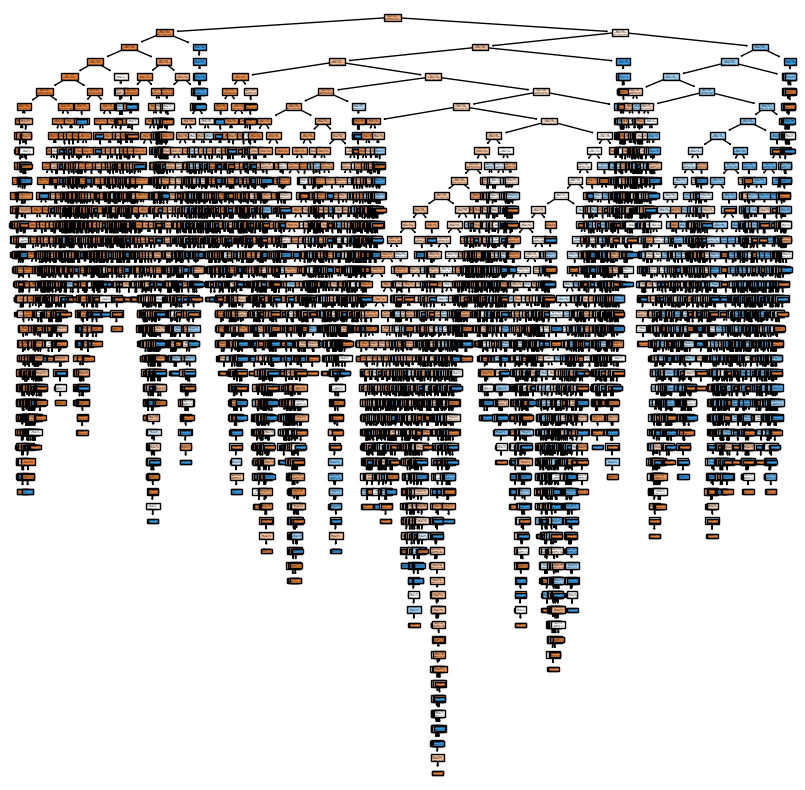

Time taken: 592.11 seconds


In [380]:

import time

start_time = time.time()

# Plot l'arbre
plt.figure(figsize=(10,10))
tree.plot_tree(cart, filled=True)
plt.show()


end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))

# NOTE: cette procédure ma pris environ 6 minutes

In [381]:
# la procédure prend du temps car il y'a beaucoup de ' features' qui veux dire beaucoup de 'splits'
 
#Cette image est très compliquée, indiquant un arbre avec des proportions énormes. 
#Cela indique une forte probabilité que le modèle ait overfitted.

In [382]:
# Get the depth of the decision tree
depth = cart.tree_.max_depth
print(f"The depth of the decision tree is {depth}.")

The depth of the decision tree is 51.


# Tester le modèle 

In [383]:
# obtenant les prediction a partir des test_input
test_pred = cart.predict(test_input)

In [384]:
# Afficher les métriques obtenues à partir des vraies cibles " target " et des prédictions de notre modèle
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     11360
           1       0.60      0.62      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060



In [385]:
# Interprétation du résultat : 
# 0 veux dire <50k par ans , 1 veux dire >50k

# accuracy=81% , cest pas mauvais pour un modele qui est lourdement overfitted.

# NOTE IMPORTANT :

In [386]:
# Pruning est une methode utiliser dans les arbres de decision pour regler le problème du overfitting , elle est basé sur 
# la surpression des noeux qui sont moins important dans la prise de decision , elle permet de diminuer la complexité du model

# dans sklearn ya le hyperparametre alpha integré dans DecisoonTreeclassifer qui permet de realiser le pruning.

# Creation de l'arbre avec Pruning 

In [387]:
# Définir le modèle en tant que classifieur d'arbre de décision avec pruning afin d'éviter le overfitting.
# La valeur de 0,001 pour pruning semble être un bon choix pour ce modèle particulier.

In [388]:
cart_pruning = tree.DecisionTreeClassifier(ccp_alpha=0.001,random_state=123)

In [389]:
 # entrainer l'arbre 
cart_pruning.fit(train_input,train_target)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=123)

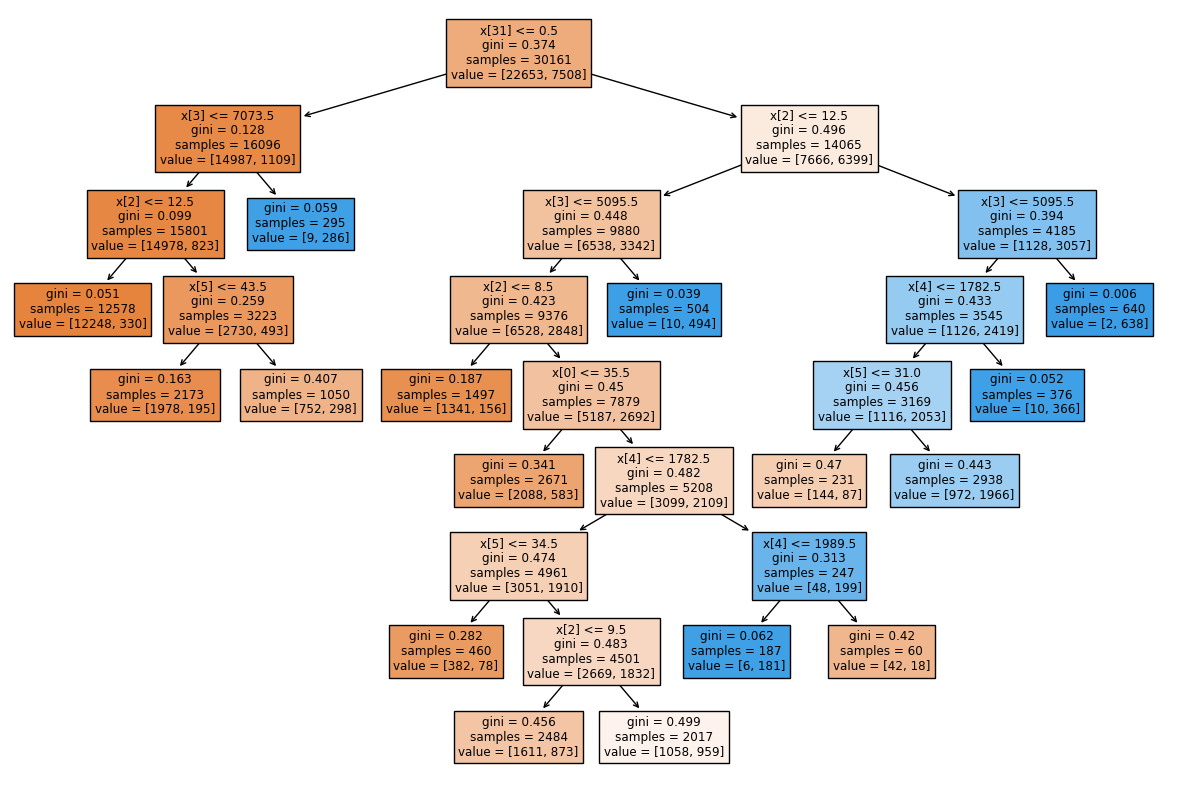

Time taken: 3.77 seconds


In [390]:

start_time = time.time()

# Plot l'arbre

plt.figure(figsize=(15,10))
tree.plot_tree(cart_pruning, filled=True)
plt.show()

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))

# NOTE: cette procédure est tres rapid pa rapport a la précedante " 2 seconde "










# Tester le modèle 

In [391]:
test_pred = cart_pruning.predict(test_input)
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     11360
           1       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



In [ ]:
#La précision est passée de 80 % à 85 % après pruning , cela confirme l'effecaçité du pruning 

In [179]:
feature0 = test_dummies.iloc[:, 0]

# print the 0 feature
print(feature0)

0        25
1        38
2        28
3        44
4        34
         ..
15055    33
15056    39
15057    38
15058    44
15059    35
Name: Age, Length: 15060, dtype: int64


# PART 2 : RANDOM FOREST 

## Creation et Training du modèle 

In [180]:
#Initialiser le modèle en tant que classifieur de forêt aléatoire 
random_forest = RandomForestClassifier(random_state=123)

In [181]:
# entrainer le modele 
random_forest.fit(train_input,train_target)

RandomForestClassifier(random_state=123)

## Tester le modèle

In [182]:
test_pred = random_forest.predict(test_input)
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11360
           1       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [54]:
 # on va essayer daugemnter la performance on ajustant certain hyperparametre 

In [183]:
#Initialiser le modèle en tant que classifieur de forêt aléatoire avec 150 arbres (la valeur par défaut est de 100 arbres).
random_forest = RandomForestClassifier(n_estimators = 150,random_state=123)

In [184]:
# entrainer le modele 
random_forest.fit(train_input,train_target)

RandomForestClassifier(n_estimators=150, random_state=123)

## Tester le nouvaux modèle

In [185]:
test_pred = random_forest.predict(test_input)
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11360
           1       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [ ]:
# les resultat sont les memes rien na changer 

# Application de Élagage sur la Foret aleatoire 

## Creation du modèle 

In [186]:
# nitialiser le modèle en tant que classificateur de forêt aléatoire avec élagage
ranf_pruning = RandomForestClassifier(ccp_alpha = 0.0001,random_state=123)

In [187]:
# entrainer le modele 
ranf_pruning.fit(train_input,train_target)

RandomForestClassifier(ccp_alpha=0.0001, random_state=123)

## Tester le modèle

In [188]:
test_pred = ranf_pruning.predict(test_input) 
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.77      0.62      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.86      0.86      0.86     15060



In [ ]:
#Une légère augmentation de précision cependant elle est insignifiante. 
#Cela représente la limite des performances sur cet ensemble de données.

# Bootstrapping 

In [189]:
import time

start_time = time.time()
# Définir le nombre d'arbres dans la forêt aléatoire
n_estimators = 150


# Définir l'état aléatoire pour la reproductibilité
random_state =123

# Initialiser le classificateur de forêt aléatoire
ranf_bootstrap= RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

# Initialiser les scores de précision
scores = []

# Définir le nombre d'échantillons bootstrap
n_bootstraps = 100

# Effectuer l'échantillonnage bootstrap et ajuster le modèle
for i in range(n_bootstraps):
    # Ré-échantillonner l'ensemble de données avec remplacement
    train_input,train_target = resample(train_input,train_target, random_state=123, replace=True)
    # Ajuster le modèle sur les données ré-échantillonnées
    ranf_bootstrap.fit(train_input,train_target)
    # Faire des prédictions sur l'ensemble de données original
    test_pred = ranf_bootstrap.predict(test_input)
    # Calculer le score de précision et l'ajouter à la liste des scores
    score = accuracy_score(test_target, test_pred)
    scores.append(score)

# Calculer la moyenne et l'écart-type des scores de précision
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print(f"Score de précision moyen : {mean_accuracy:.3f}")
print(f"Ecart-type des scores de précision : {std_accuracy:.3f}")
end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))



Score de précision moyen : 0.834
Ecart-type des scores de précision : 0.006
Time taken: 591.04 seconds


In [190]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11360
           1       0.67      0.58      0.62      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.74      0.75     15060
weighted avg       0.82      0.83      0.82     15060



In [ ]:
# Note : ça prend dans les environ de 7 minutes
# n_bootstraps = 100  -> accuracy = 0.83
# n_bootstraps = 150  -> accuracy = 0.814
# # n_bootstraps = 80  -> accuracy = 0.807
# n_bootstraps = 110  -> accuracy = 0.788

In [ ]:
# random forest should be better than decision trees , but only if the dataset allows it this income prediction , seems to not 
# facilitate more than 85% correctness , after all this is real data and there isn't always a neat relationship between
# the observbale and the outcome , there is a lot of noise as well as a lot of missing variables or in another meaning a lot of 
# unquitifibale metrics such as personality or inclination of the person in question.

# so the possible performance of any model  on this tyoe of data is capped in this case , in other words the accuracy of 
#any model on this dataset has its limits , thus decision trees and random forests models managed to reach the cap to extract 
# the maximum of this dataset 

# PART 3 : AdaBoost

## Creation et Training du modèle

In [191]:
# Créer un classificateur AdaBoost
ada = AdaBoostClassifier(n_estimators=150, learning_rate=0.1, random_state=123)


In [192]:
# entrainer le modele 
ada.fit(train_input,train_target)

AdaBoostClassifier(learning_rate=0.1, n_estimators=150, random_state=123)

## Tester le modèle 

In [193]:
test_pred = ada.predict(test_input) 
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11360
           1       0.71      0.60      0.65      3700

    accuracy                           0.84     15060
   macro avg       0.79      0.76      0.78     15060
weighted avg       0.84      0.84      0.84     15060



## Cross validation 

In [ ]:
# note : ça prend 9 minutes

In [194]:
start_time = time.time()

# Créer un modèle Adaboost avec une validation croisée
ada_boost = AdaBoostClassifier(random_state=123)
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1],
             "algorithm": ["SAMME", "SAMME.R"]}
ada_boost_cv = GridSearchCV(ada_boost, param_grid=param_grid, cv=5)
ada_boost_cv.fit(train_input,train_target)

# Obtenir les meilleures hyperparamètres
print("Meilleurs hyperparamètres: ", ada_boost_cv.best_params_)

# Evaluer la performance sur l'ensemble de test
test_pred = ada_boost_cv.predict(test_input)
print(classification_report(test_target, test_pred))

end_time = time.time()

print("Time taken: {:.2f} seconds".format(end_time - start_time))

Meilleurs hyperparamètres:  {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     11360
           1       0.61      0.62      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060

Time taken: 552.48 seconds
